# Data Visualisation

Numbers might 'convince' people, but they don't move people. 

Consider the data from before; there were lots of way to 'twist' the numbers as to how age compares to population, however, this is much clearer.... 


In [95]:
import pandas as pd
from pathlib import Path

if not (source:= Path('data/ni_pop.csv')).exists():
    print('Downloading...')
    source = 'https://www.opendatani.gov.uk/dataset/62e7073f-e924-4d3f-81a5-ad45b5127682/resource/67c25586-b9aa-4717-9a4b-42de21a403f2/download/parliamentary-constituencies-by-single-year-of-age-and-gender-mid-2001-to-mid-2019.csv'

df = pd.read_csv(source) # `read_csv` can read from URL's or from local files aswell
df.to_csv('data/ni_pop.csv', index=False) # Stash for later

df_2019_all = df[
    (df['Mid_Year_Ending'] == 2019)&
    (df['Gender'] == 'All persons')
]

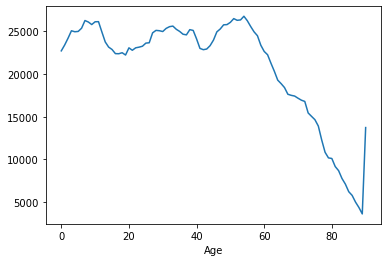

In [97]:
df_2019_all.groupby('Age')['Population_Estimate'].sum().plot()

## Graph Styling

There's lots of cool stuff we can do, lets start off with:

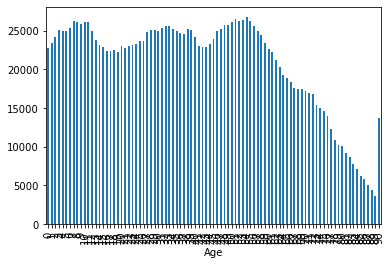

In [100]:
df_2019_all.groupby('Age')['Population_Estimate'].sum().plot(kind='bar') # UGLY

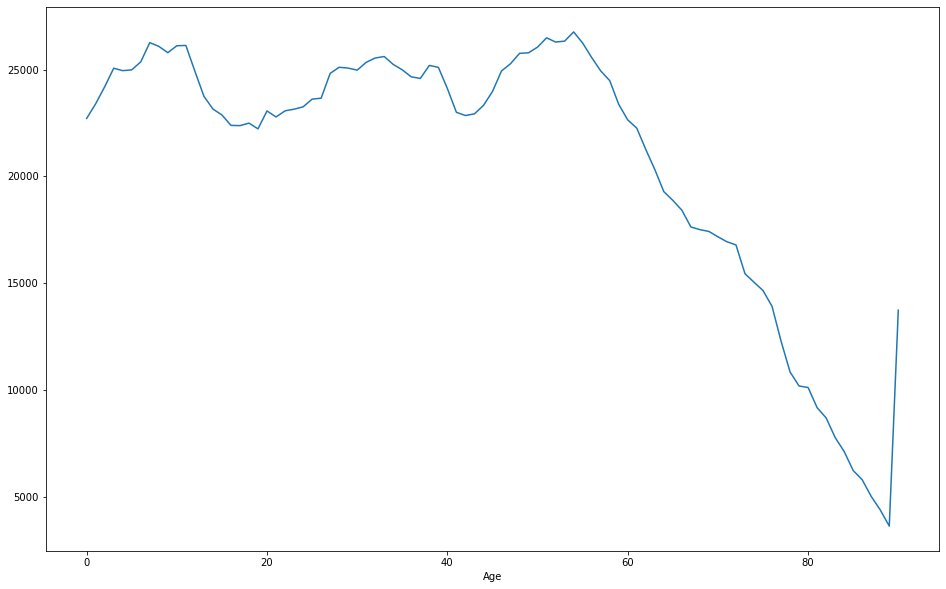

In [8]:
df_2019_all.groupby('Age')['Population_Estimate'].sum().plot(figsize=(16,10)) # EMBIGGEN

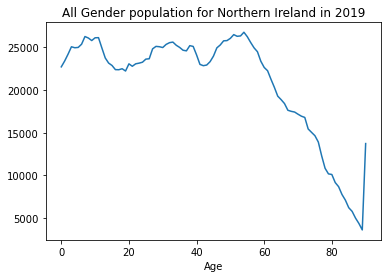

In [9]:
df_2019_all.groupby('Age')['Population_Estimate'].sum().plot(
    title="All Gender population for Northern Ireland in 2019"
)

These are very simple controls but we can also do more indepth, by leveraging a lower level package called `matplotlib` (that `pandas` also uses under the hood...)

Text(0, 0.5, 'Population')

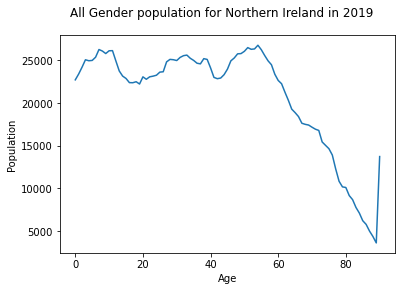

In [10]:
from matplotlib.pylab import plt

figure, axes = plt.subplots()
df_2019_all.groupby('Age')['Population_Estimate'].sum().plot(ax=axes)
figure.suptitle('All Gender population for Northern Ireland in 2019')
axes.set_ylabel('Population')
# Notice that I don't tell it to say 'Age' anywhere here? 
# The `plot` function works that our itself

There are also some easter eggs in some packages, like this one... 

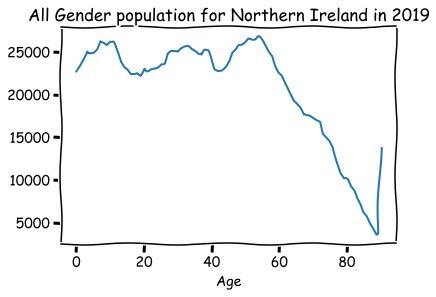

In [7]:
with plt.xkcd():
    df_2019_all.groupby('Age')['Population_Estimate'].sum().plot(
        title="All Gender population for Northern Ireland in 2019"
    )

Graph Styling and the options you have to customise your visual outputs is not something that can be taught; experiment, play, and research with your own data/audience to see what works. All I can do is show you the doorway!

## More Complex Series Data Sets

Sticking with our 6-dimensional population dataset, lets see how many of those dimensions we can get on screen without melting heads (this is a common occurance in data science...)

First up, easy one; Can we do a gender breakdown? 

In [11]:
df_2019 = df[
    (df['Mid_Year_Ending'] == 2019)&
    (df['Gender'] != 'All persons') # Notice the negation; we *don't* want the 'All persons' records this time
]

In [12]:
df_2019

,Geo_Name,Geo_Code,Mid_Year_Ending,Gender,Age,Population_Estimate
5005,Belfast East,N06000001,2019,Females,0,535
5006,Belfast East,N06000001,2019,Females,1,579
5007,Belfast East,N06000001,2019,Females,2,575
5008,Belfast East,N06000001,2019,Females,3,558
5009,Belfast East,N06000001,2019,Females,4,550
...,...,...,...,...,...,...
93361,West Tyrone,N06000018,2019,Males,86,103
93362,West Tyrone,N06000018,2019,Males,87,113
93363,West Tyrone,N06000018,2019,Males,88,80
93364,West Tyrone,N06000018,2019,Males,89,52


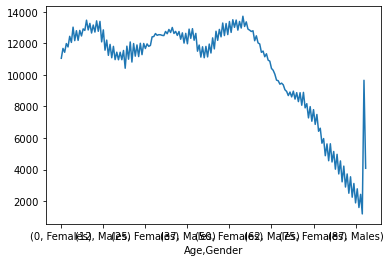

In [13]:
df_2019.groupby(['Age','Gender'])['Population_Estimate'].sum().plot()

Ok, that didn't work; lets take a closer look.

In [101]:
df_2019.groupby(['Age','Gender'])['Population_Estimate'].sum().to_frame()

Population_Estimate
Age Gender                      
0   Females                11048
    Males                  11673
1   Females                11428
    Males                  11980
2   Females                11767
...                          ...
88  Males                   1596
89  Females                 2428
    Males                   1189
90  Females                 9654
    Males                   4080

[182 rows x 1 columns]

In [15]:
df_2019.groupby(['Age','Gender'])['Population_Estimate'].sum().unstack()

Gender,Females,Males
Age,,
0,11048,11673
1,11428,11980
2,11767,12439
3,12054,13020
4,12166,12794
...,...,...
86,3541,2248
87,3116,1889
88,2779,1596


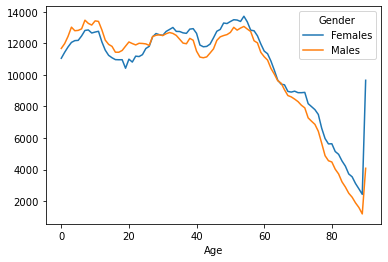

In [16]:
df_2019.groupby(['Age','Gender'])['Population_Estimate'].sum().unstack().plot()

What can we infer from this graph?

Can we just do the same thing for geo_code? It's just another Dimension just like Gender!

## Sidebar: Stacked Bar Charts Are Almost **Always** a Mistake

What on earth does this thing even mean?

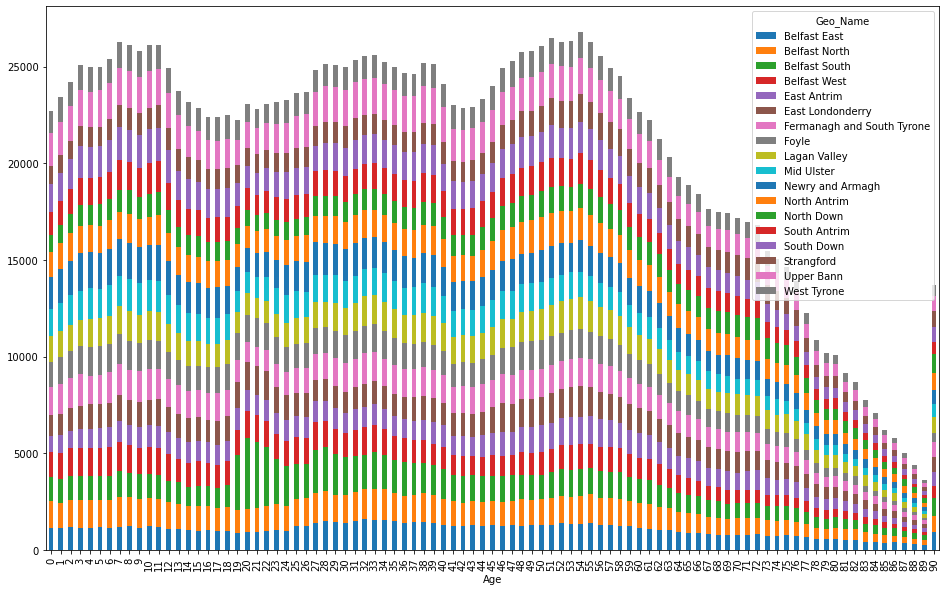

In [17]:
df_2019.groupby(['Age','Geo_Name'])['Population_Estimate'].sum().unstack().plot.bar(stacked=True, figsize=(16,10))

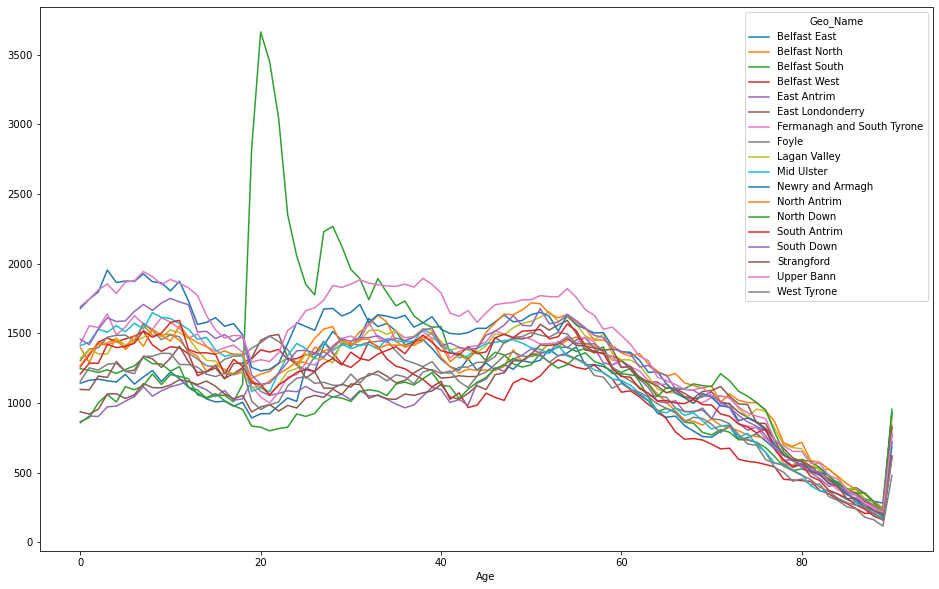

In [18]:
df_2019.groupby(['Age','Geo_Name'])['Population_Estimate'].sum().unstack().plot(
figsize=(16,10))

Now that we're relatively comfortable with the selection methods, we can take this right back to the original data and see a few different years.

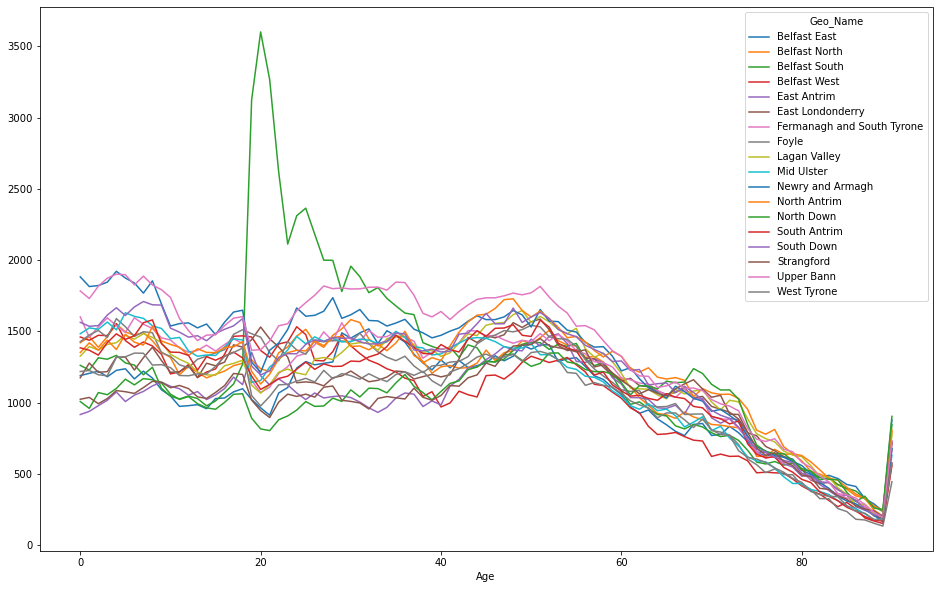

In [19]:
df[
    (df['Mid_Year_Ending'] == 2016)&
    (df['Gender'] == 'All persons')
].groupby(['Age','Geo_Name'])['Population_Estimate'].sum().unstack().plot(
figsize=(16,10))

Can you spot any differences between these two graphs? Because I can't. 

We need a way to abstract the distribution of population to a simpler structure; our brains are not good at comparing complex data, and that's why Data Visualisation is such an important skill.

Instead of looking at each point on a line being 'the number of people that age', what about if it's 'the number of people that age or lower'? 

This is called a 'cumulative distribution plot', and you'll often see it written `cumsum`, and stop laughing it's not funny...

Lets go back to our first single line graph for 2019 population.

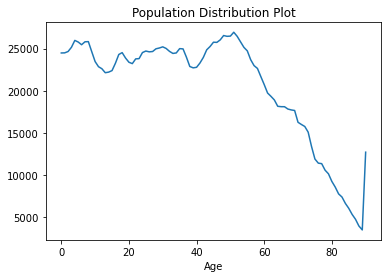

In [20]:
df[
    (df['Mid_Year_Ending'] == 2016)&
    (df['Gender'] == 'All persons')
].groupby('Age')['Population_Estimate'].sum().plot(
    title='Population Distribution Plot'
)

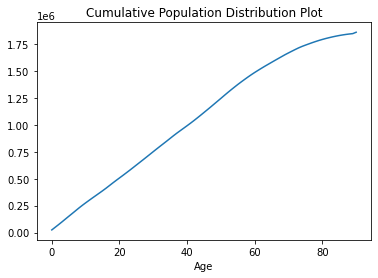

In [21]:
df[
    (df['Mid_Year_Ending'] == 2016)&
    (df['Gender'] == 'All persons')
].groupby('Age')['Population_Estimate'].sum().cumsum().plot(
    title='Cumulative Population Distribution Plot'
)

This is now a *very* simple graph. You can think of the first graph as being the 'derivative' of this one. 

This cumulative plot hides a lot of detail but can be useful for comparing groups and making aggregations. For instance; if we 'normalise' this graph (such that it goes from 0 to 1), we can easily make percentage style statements.

In [22]:
pop_cumsum = df[
    (df['Mid_Year_Ending'] == 2016)&
    (df['Gender'] == 'All persons')
].groupby('Age')['Population_Estimate'].sum().cumsum()

pop_cumsum

Age
0       24486
1       48984
2       73640
3       98795
4      124769
       ...   
86    1837116
87    1841898
88    1845884
89    1849406
90    1862137
Name: Population_Estimate, Length: 91, dtype: int64

In [23]:
pop_cumsum/=pop_cumsum.max()/100
pop_cumsum

Age
0       1.314941
1       2.630526
2       3.954596
3       5.305464
4       6.700313
         ...    
86     98.656329
87     98.913130
88     99.127186
89     99.316323
90    100.000000
Name: Population_Estimate, Length: 91, dtype: float64

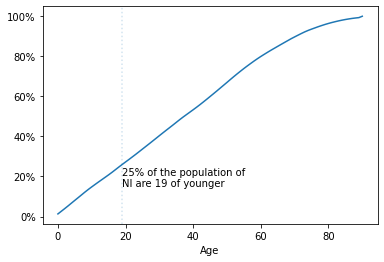

In [27]:
import matplotlib.ticker as mtick # For now, it's just magic, deal with it

f,ax = plt.subplots()
pop_cumsum.plot(ax=ax)

yoof = 25 #% of population
pop_yoof = (pop_cumsum<=yoof).argmin() # Below what age are 25% of the population (it's 19)
ax.axvline(pop_yoof, alpha=0.2, ls=':')
ax.annotate(f'{yoof}% of the population of \nNI are {pop_yoof} of younger', 
    (pop_yoof,yoof-10) # Plot the label 10% below the given value
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

This just demonstrates some of the flexibility you can put in to your graphing, but the *real* power of this approach is to simplify and standardise the 'complicated' stuff so you can focus on bigger abstractions. For instance, now we know how to plot in this `cumsum` approach, we can attack the question of how NI's age profile has changed over time.

If we can do it for one year, why not all of them?

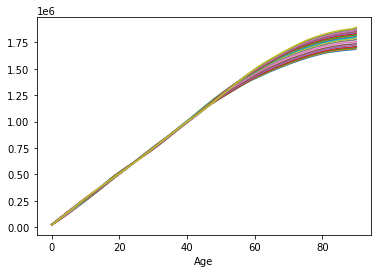

In [28]:
f,ax = plt.subplots()

for year, grp in df.groupby('Mid_Year_Ending'):
    grp_cumsum=grp[grp['Gender'] == 'All persons'].groupby('Age')['Population_Estimate'].sum().cumsum()
    grp_cumsum.plot(ax=ax, label=year)

## Ok, Now make it pretty

References: 
* [ColourMaps](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)


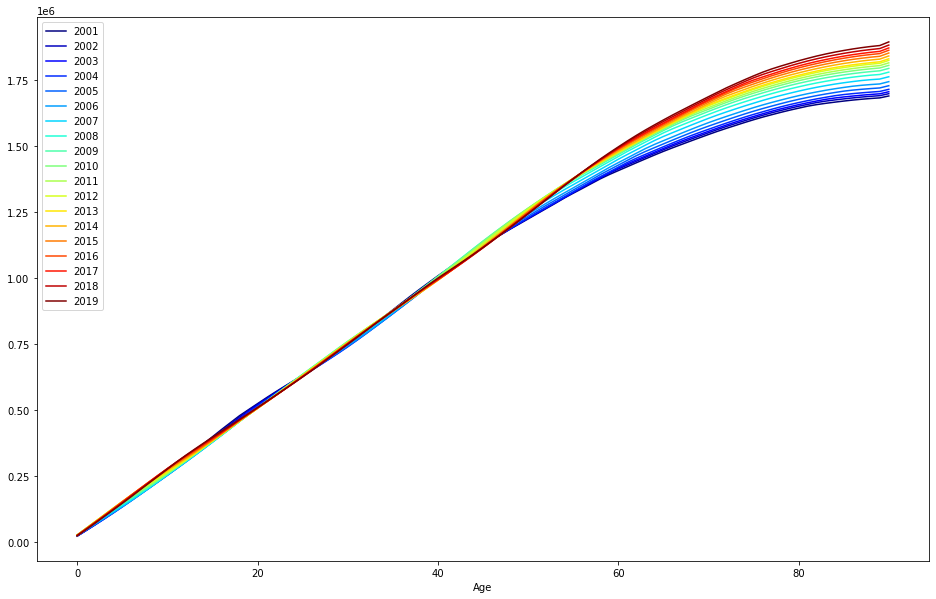

In [29]:
import numpy as np

f,ax = plt.subplots(figsize=(16,10))

yrs=sorted(df.Mid_Year_Ending.unique())
colour_map = dict(zip(yrs, plt.cm.jet(np.linspace(0,1,len(yrs)))))

for year, grp in df.groupby('Mid_Year_Ending'):
    grp_cumsum=grp[grp['Gender'] == 'All persons'].groupby('Age')['Population_Estimate'].sum().cumsum()
    grp_cumsum.plot(ax=ax, label=year, c=colour_map[year])
    
ax.set_ylabel('')
ax.legend()

What can you infer about this graph?

What gets in the way of interpreting this graph?

# What normalisation really means

In the above chart we can see that while it looks like there is some kind of wiggling going on in the <50 age group, the graph is dominated by a general trend in increasing populations >50 years old. 

So, we can say things like 'more of our population are older' and then infer 'life expectancy is increasing'. 

But what about if we wanted to ask about specific changes in the shape of the distribution in a given year, regardless of the general trend of an 'ageing population'?

We can perform [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling), which is a normalisation method that remaps a range of values to the bounds \[0,1\], which then makes it easy to scale to 'percentage' in this case.

The general equation for this operation on a given series $S$ is $S_{norm} = \frac{S-S_{min}}{S_{max} - S_{min}}$. 

Since we're dealing with age, we can simplify out $S_{min}=0$ so $S_{norm} = \frac{S}{S_{max}}$

What this means is that for the whole population regardless of which year we're measuring, we can see what proportion of the population is at a given age.

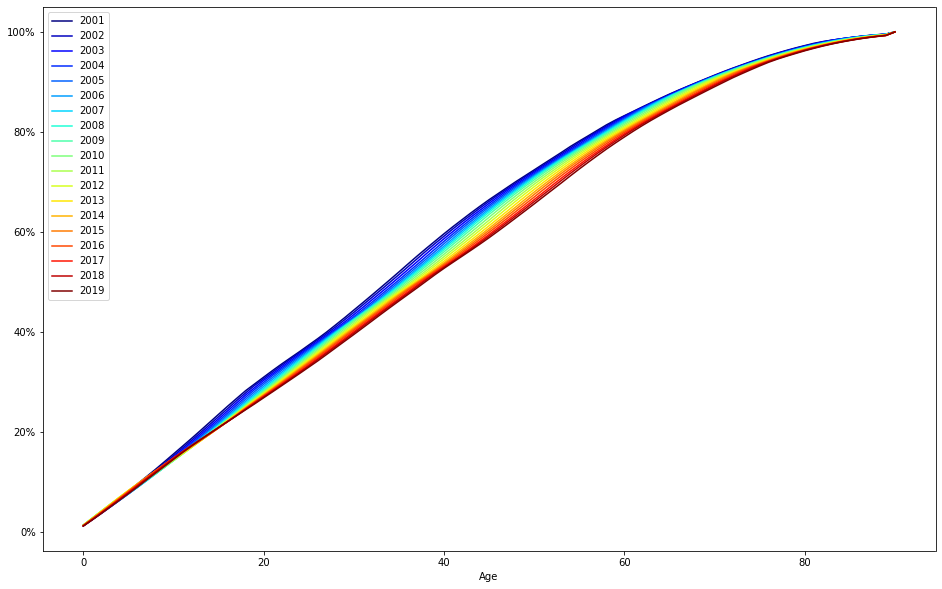

In [30]:
f,ax = plt.subplots(figsize=(16,10))

yrs=sorted(df.Mid_Year_Ending.unique())
colour_map = dict(zip(yrs, plt.cm.jet(np.linspace(0,1,len(yrs)))))

for year, grp in df.groupby('Mid_Year_Ending'):
    grp_cumsum=grp[grp['Gender'] == 'All persons'].groupby('Age')['Population_Estimate'].sum().cumsum()
    grp_cumsum/=grp_cumsum.max()/100 # Normalise to percentage for each year
    grp_cumsum.plot(ax=ax, label=year, c=colour_map[year])
ax.legend()

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

This doesn't necessarily tell you anything really new in this case, but it does emphasise that the proportion of young people (17-25) and working age populations(30-50) are dropping over the time period.

## Yadda yadda move it on: Better Visualisations

We can play with graphs till the cows come home, but what about working out what is 'home' to the cows? 

Combining data sources is essential to contextualise and relate to data. 

For instance, what about if instead of looking at the changes in population makeup over time, we look at geography again; 

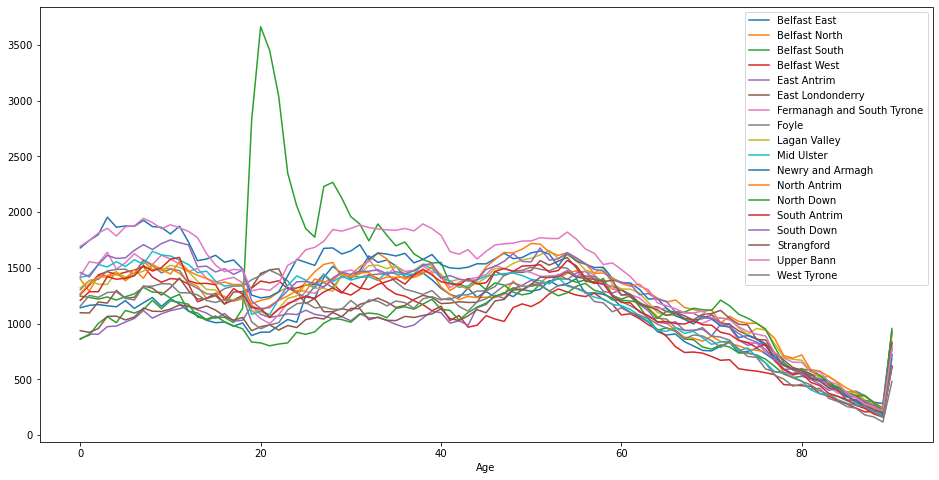

In [31]:
f,ax = plt.subplots(figsize=(16,8))

for geo, grp in df[df['Mid_Year_Ending']==2019].groupby('Geo_Name'):
    grp_sum=grp[grp['Gender'] == 'All persons'].groupby('Age')['Population_Estimate'].sum()
    grp_sum.plot(ax=ax, label=geo)
ax.legend()

Categorical observations like 'Constituency' aren't as easy to intuit on when they're plotted out like this.

### Sidebar: Interactive Graphing with Plotly

[Plotly](https://plotly.com/graphing-libraries/) is great, and [Plotly Express](https://plotly.com/python/plotly-express/) greatly reduced the barrier to entry got getting up to speed with engaging, interactive graphics (especially if you live in `pandas` land)

Check out the example below for the most basic demo of interactive functionality using the [iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), before we start getting clever


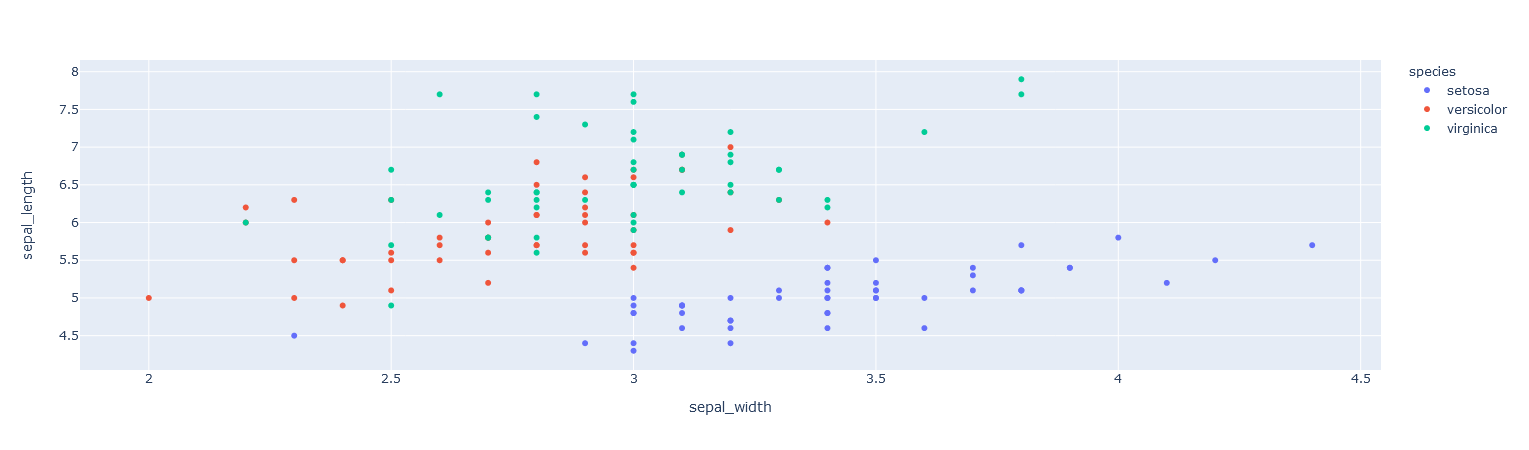

In [32]:
import plotly.express as px
df_iris = px.data.iris() # plotly_express makes it rea
fig = px.scatter(df_iris, x="sepal_width", y="sepal_length", color="species")
fig.show()

## Question 2: Plotly Conversion

Can you adapt our basic geo_name line graphs to use Plotly Express and be interactive? 

What can this graph tell you about what happens to people in Northern Ireland around the age of 18?

Try it out for yourself and check Q2.ipynb for an answer.

Bonus Round: Try building a heatmap instead?


# Learning Outcomes

In this section we've learned: 

* How to use `pandas` build in graphing capabilities
* Leveraging `matplotlib` to style and modify graphs
* How to use normalisation to present comparitive data
* (Very gentle) introduction to the `plotly` ecosystem
